<h1 style="text-align: center; font-size: 300%">Flowers Classification using Resnet50</h1>

### Downloading Dataset

In [ ]:
# download the dataset
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz

--2025-06-24 11:36:09--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/flowers/102/102flowers.tgz [following]
--2025-06-24 11:36:10--  https://thor.robots.ox.ac.uk/flowers/102/102flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/octet-stream]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  19.1MB/s    in 21s     

2025-06-24 11:36:32 (15.7 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]



In [ ]:
#download labels
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2025-06-24 11:36:44--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/flowers/102/imagelabels.mat [following]
--2025-06-24 11:36:44--  https://thor.robots.ox.ac.uk/flowers/102/imagelabels.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502 [application/octet-stream]
Saving to: ‘imagelabels.mat’

imagelabels.mat     100%[===================>]     502  --.-KB/s    in 0s      

2025-06-24 11:36:45 (134 MB/s) - ‘imagelabels.mat’ saved [502/502]



Extract the image data

In [ ]:
# extract the dataset
!tar -xvf 102flowers.tgz

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

Read the labels file

In [ ]:
import scipy.io

def read_mat_file(file_path):
    mat_data = scipy.io.loadmat(file_path)
    return mat_data

file_path = 'imagelabels.mat'
mat_data = read_mat_file(file_path)

print(list(mat_data.keys()))

['__header__', '__version__', '__globals__', 'labels']


In [ ]:
print(mat_data['labels'])
print(mat_data['__globals__'])
print(mat_data['__header__'])
print(mat_data['__version__'])

[[77 77 77 ... 62 62 62]]
[]
b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009'
1.0


### Preparing Dataset

In [64]:
import os
import requests
import pandas as pd

# ——— 1) Build the dataset DataFrame ——————————————————————————————————————
# Load .mat labels (1–102) and zero‐index them (0–101)
mat_data = scipy.io.loadmat('imagelabels.mat')
labels = mat_data['labels'].flatten() - 1

# Read and sort image filenames from the 'jpg/' folder
images = sorted(os.listdir('jpg'))
assert len(images) == len(labels), "Mismatch between images and labels"

# Fetch human‐readable flower names
url = (
    "https://gist.githubusercontent.com/"
    "JosephKJ/94c7728ed1a8e0cd87fe6a029769cde1"
    "/raw/Oxford-102_Flower_dataset_labels.txt"
)
resp = requests.get(url)
flower_names = [
    line.strip().strip("'\"")
    for line in resp.text.splitlines()
    if line.strip()
]
assert len(flower_names) == 102, f"Expected 102 names; got {len(flower_names)}"

# Assemble DataFrame
dataset = pd.DataFrame({
    'image':       images,
    'label':       labels,
    'flower_name': [flower_names[l] for l in labels]
})

dataset.head()

,image,label,flower_name
0,image_00001.jpg,76,passion flower
1,image_00002.jpg,76,passion flower
2,image_00003.jpg,76,passion flower
3,image_00004.jpg,76,passion flower
4,image_00005.jpg,76,passion flower


In [65]:
# e.g. for the very first image
print(images[0], labels[0], flower_names[labels[0]])


image_00001.jpg 76 passion flower


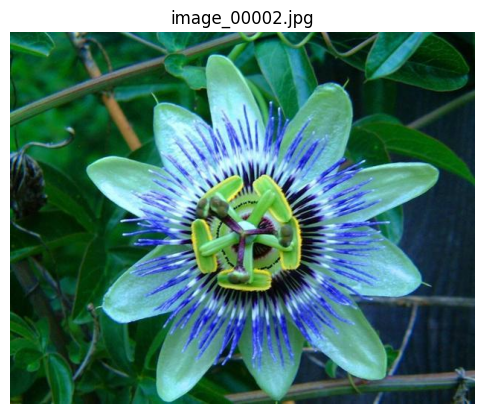

In [66]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Path to your image file
img_path = os.path.join('jpg', 'image_00002.jpg')  # or './jpg/image_00001.jpg'

# Load & visualize
img = Image.open(img_path)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title('image_00002.jpg')
plt.axis('off')
plt.show()


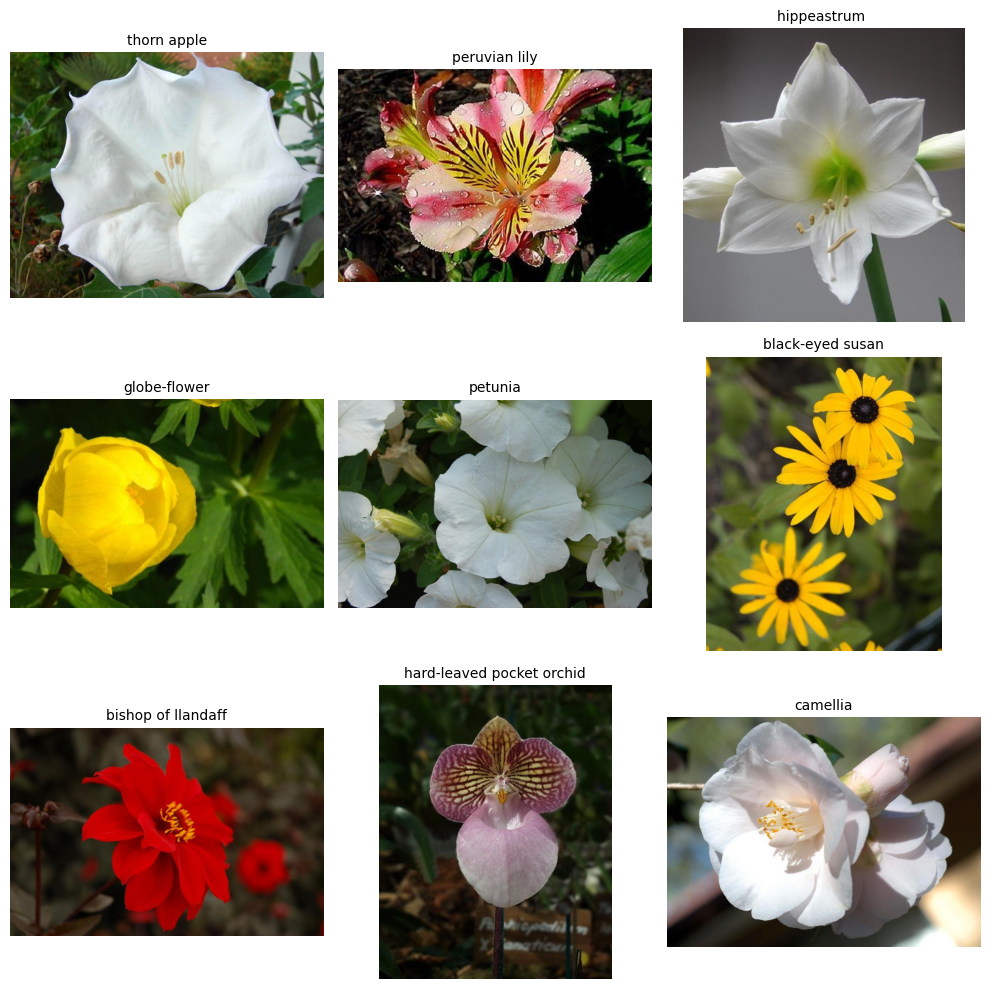

In [ ]:
# ————— Now visualize 9 random samples —————
sample = dataset.sample(n=9, random_state=42).reset_index(drop=True)

plt.figure(figsize=(10,10))
for idx, row in sample.iterrows():
    img_path = os.path.join('jpg', row['image'])
    img = plt.imread(img_path)

    ax = plt.subplot(3, 3, idx+1)
    plt.imshow(img)
    ax.set_title(row['flower_name'], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
dataset.sample(10)

,image,label,flower_name
8116,image_08117.jpg,92,ball moss
4981,image_04982.jpg,46,marigold
801,image_00802.jpg,80,frangipani
7112,image_07113.jpg,9,globe thistle
1687,image_01688.jpg,81,clematis
4525,image_04526.jpg,70,gazania
4387,image_04388.jpg,35,ruby-lipped cattleya
5664,image_05665.jpg,3,sweet pea
1003,image_01004.jpg,45,wallflower
5885,image_05886.jpg,62,black-eyed susan


In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

### Data Loading and Augmentation using Keras ImageDataGenerator

In [75]:
# ——— 2) Split into train/val/test (80/10/10) ——————————————————————
train_val_df, test_temp_df = train_test_split(
    dataset, test_size=0.20, stratify=dataset['label'], random_state=42
)
val_df, test_df = train_test_split(
    test_temp_df, test_size=0.50, stratify=test_temp_df['label'], random_state=42
)

# ——— 3) Prepare ImageDataGenerators ——————————————————————————
IMG_HEIGHT, IMG_WIDTH, BATCH_SIZE = 224, 224, 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=50,
    shear_range=0.2,
    zoom_range=[0.75, 1.25],
    brightness_range=[0.5, 1.5],
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Cast labels to strings
for df in (train_val_df, val_df, test_df):
    df['label'] = df['label'].astype(str)

# Enforce numeric class order
numeric_classes = [str(i) for i in range(102)]

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_val_df,
    directory='jpg',
    x_col='image',
    y_col='label',
    classes=numeric_classes,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='jpg',
    x_col='image',
    y_col='label',
    classes=numeric_classes,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='jpg',
    x_col='image',
    y_col='label',
    classes=numeric_classes,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("Class indices:", train_generator.class_indices)


Found 6551 validated image filenames belonging to 102 classes.
Found 819 validated image filenames belonging to 102 classes.
Found 819 validated image filenames belonging to 102 classes.
Class indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 8

In [76]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ——— 4) Build and compile the model ————————————————————————————
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(len(numeric_classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze first half of ResNet layers
freeze_at = len(base_model.layers) // 2
for layer in base_model.layers[:freeze_at]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,794,534 (98.40 MB)

 Trainable params: 23,566,950 (89.90 MB)

 Non-trainable params: 2,227,584 (8.50 MB)

In [77]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  175


In [79]:
# ——— 5) Set up callbacks ———————————————————————————————————————
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1
)

# ——— 6) Train the model ——————————————————————————————————————
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=7,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[reduce_lr]
)

# ——— 7) Evaluate on the test set —————————————————————————————
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples // BATCH_SIZE
)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/7
204/204 ━━━━━━━━━━━━━━━━━━━━ 110s 537ms/step - accuracy: 0.9440 - loss: 0.2153 - val_accuracy: 0.9463 - val_loss: 0.2201 - learning_rate: 1.0000e-04
Epoch 2/7
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9375 - loss: 0.1774 - val_accuracy: 0.9500 - val_loss: 0.2187 - learning_rate: 1.0000e-04
Epoch 3/7
204/204 ━━━━━━━━━━━━━━━━━━━━ 142s 547ms/step - accuracy: 0.9589 - loss: 0.1494 - val_accuracy: 0.9575 - val_loss: 0.1733 - learning_rate: 1.0000e-04
Epoch 4/7
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9688 - loss: 0.0751 - val_accuracy: 0.9600 - val_loss: 0.1747 - learning_rate: 1.0000e-04
Epoch 5/7
204/204 ━━━━━━━━━━━━━━━━━━━━ 109s 532ms/step - accuracy: 0.9719 - loss: 0.1026 - val_accuracy: 0.9500 - val_loss: 0.1925 - learning_rate: 1.0000e-04
Epoch 6/7
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9375 - loss: 0.1944 - val_accuracy: 0.9513 - val_loss: 0.1934 - learning_rate: 1.0000e-04
Epoch 7/7
204/204 ━━━━━━━━━━━━━━━━━━━━ 139s 535ms/step 

### Evaluate and Save model

In [80]:
# Save the model in HDF5 format
model.save('flower_classifier.h5')

In [ ]:
model.save("flowers102_model.keras")

In [81]:
model.evaluate(test_generator)

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.9802 - loss: 0.1022


[0.11591996997594833, 0.970695972442627]

- Model Accuracy: 98.02%
- Model Loss: 10.22%

### Plotting Accuracy and Loss

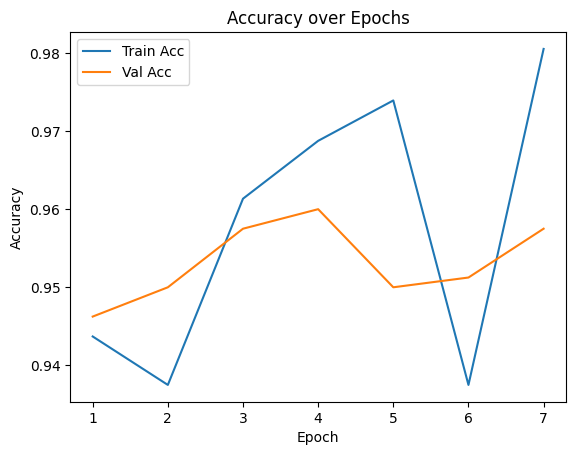

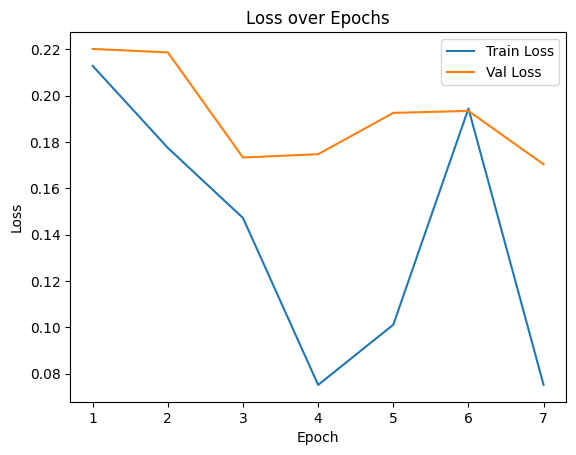

In [84]:
import matplotlib.pyplot as plt

# ——— 9) Plot training history ————————————————————————————————
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure()
plt.plot(epochs, history.history['accuracy'], label='Train Acc')
plt.plot(epochs, history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testinng on images from device

In [85]:
import requests
import numpy as np
import cv2
from google.colab import files
from tensorflow.keras.models import load_model

# ——— 10) Single-image inference ————————————————————————————————
def preprocess_image_cv(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    img = preprocess_input(img)
    return np.expand_dims(img, axis=0)

THRESHOLD = 0.5
uploaded = files.upload()
for fn in uploaded.keys():
    img_tensor = preprocess_image_cv(fn)
    preds = model.predict(img_tensor)[0]
    idx = np.argmax(preds)
    prob = preds[idx]
    if prob < THRESHOLD:
        print(f"No confident match for {fn} (conf={prob:.2f})")
    else:
        print(f"{fn} → {flower_names[idx]} (conf={prob:.2f})")

Saving Image_1.jpg to Image_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image_1.jpg → rose (conf=1.00)
